In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.optimize
import scipy.interpolate
import scipy.signal
import scipy.linalg

In [4]:
#Data = Data points given.
#tme = tme variable
#y   = concentration
Data=np.array([
  [0.00, 10.18066949],
  [0.05, 9.68532650],
  [0.10, 9.57756420],
  [0.15, 8.97698692],
  [0.20, 9.26775331],
  [0.25, 8.57867356],
  [0.30, 8.41627338],
  [0.35, 8.52557991],
  [0.40, 8.14847057],
  [0.45, 8.11814474],
  [0.50, 7.73210163],
  [0.55, 7.49610525],
  [0.60, 7.21145539],
  [0.65, 7.38406612],
  [0.70, 7.10966780],
  [0.75, 6.97690056],
  [0.80, 6.91499709],
  [0.85, 6.52208220],
  [0.90, 6.51737682],
  [0.95, 6.60428743],
  [1.00, 6.45108555],
  [1.05, 6.08735980],
  [1.10, 5.98447390],
  [1.15, 5.86766072],
  [1.20, 5.73590517],
  [1.25, 5.81354866],
  [1.30, 5.81578848],
  [1.35, 5.75317737],
  [1.40, 5.59196586],
  [1.45, 5.34741359],
  [1.50, 5.46917538],
  [1.55, 5.20361472],
  [1.60, 5.13529086],
  [1.65, 5.05361424],
  [1.70, 5.00315004],
  [1.75, 4.94850650],
  [1.80,  4.89647212],
  [1.85,  4.87856994],
  [1.90,  4.81989700],
  [1.95,  4.73013991],
  [2.00,  4.68719730],
  [2.05,  4.84664770],
  [2.10,  4.73156881],
  [2.15,  4.63313463],
  [2.20,  4.46573500],
  [2.25,  4.42847230],
  [2.30,  4.34159682],
  [2.35,  4.55801088],
  [2.40,  4.45020533],
  [2.45, 4.36256710],
  [2.50,  4.24821319],
  [2.55,  4.16533611],
  [2.60, 4.26286833],
  [2.65, 4.33237268],
  [2.70, 4.05711806],
  [2.75,  4.04768959],
  [2.80,   4.05347346],
  [2.85,   3.92854148],
  [2.90,   4.06819262],
  [2.95,   3.95713209],
  [3.00,   4.08663267],
  [3.05,   3.89555427],
  [3.10,   3.92536072],
  [3.15 ,  3.76973818],
  [3.20,   3.80270701],
  [3.25 ,  3.71621507],
  [3.30 ,  3.84731361],
  [3.35 ,  3.84958374],
  [3.40 ,  3.68680050],
  [3.45  , 3.74788149],
  [3.50  , 3.62148035],
  [3.55 ,  3.65731511],
  [3.60 ,  3.70935268],
  [3.65 ,  3.62551283],
  [3.70 ,  3.53604955],
  [3.75 ,  3.50408583],
  [3.80 ,  3.51944267],
  [3.85 ,  3.48965320],
  [3.90 ,  3.45223021],
  [3.95 ,  3.47881770],
  [4.00 ,  3.50163731],
  [4.05 ,  3.40387110],
  [4.10 ,  3.38429579],
  [4.15 ,  3.29175463],
  [4.20 ,  3.24835181],
  [4.25 ,  3.29111291],
  [4.30 ,  3.27797509],
  [4.35 ,  3.33636904],
  [4.40 ,  3.38653147],
  [4.45 ,  3.36202469],
  [4.50 ,  3.23412350],
  [4.55 ,  3.16648748],
  [4.60  , 3.26591390],
  [4.65  , 3.24636381],
  [4.70  , 3.22389575],
  [4.75 ,  3.20646282],
  [4.80 ,  3.04858312],
  [4.85 ,  3.15725052],
  [4.90 ,  3.09239149],
  [4.95 ,  3.02114805],
  [5.00 ,  2.98016748]])

In [5]:
tme=Data[:,0]
tme

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  ])

In [6]:
y=Data[:,1]
y

array([10.18066949,  9.6853265 ,  9.5775642 ,  8.97698692,  9.26775331,
        8.57867356,  8.41627338,  8.52557991,  8.14847057,  8.11814474,
        7.73210163,  7.49610525,  7.21145539,  7.38406612,  7.1096678 ,
        6.97690056,  6.91499709,  6.5220822 ,  6.51737682,  6.60428743,
        6.45108555,  6.0873598 ,  5.9844739 ,  5.86766072,  5.73590517,
        5.81354866,  5.81578848,  5.75317737,  5.59196586,  5.34741359,
        5.46917538,  5.20361472,  5.13529086,  5.05361424,  5.00315004,
        4.9485065 ,  4.89647212,  4.87856994,  4.819897  ,  4.73013991,
        4.6871973 ,  4.8466477 ,  4.73156881,  4.63313463,  4.465735  ,
        4.4284723 ,  4.34159682,  4.55801088,  4.45020533,  4.3625671 ,
        4.24821319,  4.16533611,  4.26286833,  4.33237268,  4.05711806,
        4.04768959,  4.05347346,  3.92854148,  4.06819262,  3.95713209,
        4.08663267,  3.89555427,  3.92536072,  3.76973818,  3.80270701,
        3.71621507,  3.84731361,  3.84958374,  3.6868005 ,  3.74

(a) Using exponential peeling to approximate b(j), j=1...4

By following the idea of data peeling we split the data points into three(3) part which we refer to the first one-third as below, Indpendsplit = The first 1/3 of the time variable. Independslit2 = The last 2/3 of the time variable.

In [7]:
# Indpendsplit = first 1/3 of tme data points
# Independsplit2 = remaining 2/3 of tme data points
Indpendsplit=tme[0:35]
Independsplit2=tme[35:]

In [8]:
Indpendsplit

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 ])

Similar to the splitting of the time variable, we split the dependent variable with the first 1/3 being, Pendsplit = 1/3 of the y variable and Pendsplit2 = 2/3 of the last part of the dependent variable.

In [10]:
Pendsplit=y[0:35]
Pendsplit2=y[35:]

In [11]:
Pendsplit

array([10.18066949,  9.6853265 ,  9.5775642 ,  8.97698692,  9.26775331,
        8.57867356,  8.41627338,  8.52557991,  8.14847057,  8.11814474,
        7.73210163,  7.49610525,  7.21145539,  7.38406612,  7.1096678 ,
        6.97690056,  6.91499709,  6.5220822 ,  6.51737682,  6.60428743,
        6.45108555,  6.0873598 ,  5.9844739 ,  5.86766072,  5.73590517,
        5.81354866,  5.81578848,  5.75317737,  5.59196586,  5.34741359,
        5.46917538,  5.20361472,  5.13529086,  5.05361424,  5.00315004])

In [12]:
# b= is the logarithm of the first 1/3 of our y variable
b = np.log(Pendsplit)
b

array([2.32049077, 2.27061201, 2.2594233 , 2.19466429, 2.22654099,
       2.1492793 , 2.13016714, 2.14307105, 2.09783025, 2.09410165,
       2.04538071, 2.01438359, 1.97567079, 1.99932445, 1.96145552,
       1.94260477, 1.93369254, 1.87519368, 1.87447197, 1.88771905,
       1.86424842, 1.80621446, 1.78916843, 1.76945604, 1.74674557,
       1.76019117, 1.76057637, 1.74975229, 1.7213309 , 1.676613  ,
       1.69912785, 1.64935352, 1.63613648, 1.62010368, 1.61006772])

In [13]:
C=np.ones(35)
C

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [14]:
# A = The matrix of coefficient of the system.
A=np.column_stack((C, Indpendsplit))
A

array([[1.  , 0.  ],
       [1.  , 0.05],
       [1.  , 0.1 ],
       [1.  , 0.15],
       [1.  , 0.2 ],
       [1.  , 0.25],
       [1.  , 0.3 ],
       [1.  , 0.35],
       [1.  , 0.4 ],
       [1.  , 0.45],
       [1.  , 0.5 ],
       [1.  , 0.55],
       [1.  , 0.6 ],
       [1.  , 0.65],
       [1.  , 0.7 ],
       [1.  , 0.75],
       [1.  , 0.8 ],
       [1.  , 0.85],
       [1.  , 0.9 ],
       [1.  , 0.95],
       [1.  , 1.  ],
       [1.  , 1.05],
       [1.  , 1.1 ],
       [1.  , 1.15],
       [1.  , 1.2 ],
       [1.  , 1.25],
       [1.  , 1.3 ],
       [1.  , 1.35],
       [1.  , 1.4 ],
       [1.  , 1.45],
       [1.  , 1.5 ],
       [1.  , 1.55],
       [1.  , 1.6 ],
       [1.  , 1.65],
       [1.  , 1.7 ]])

In [15]:
TransposeA = A.T
TransposeA

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  ],
       [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 ]])

In [16]:
# productATA = The product of the matrix transpose of A and A.
productATA = np.dot(TransposeA, A)
productATA

array([[35.    , 29.75  ],
       [29.75  , 34.2125]])

In [17]:
# productATb = The product of the matrix transpose of A and b.
productATb = np.dot(TransposeA, b)
productATb

array([67.25516373, 53.57389537])

In [18]:
# sol = The solution after solving the linear system for the unknowns ln(b_1) and b_2
sol=np.linalg.solve(productATA, productATb)
sol

array([ 2.26376599, -0.40257634])

In [19]:
# So we have our parameters as
b_1=np.exp(2.26376599)
b_2=-0.40357634

In [20]:
b_1

9.619247027071083

In [21]:
# r = represent our residue of from the peeling. And is obtained as such;
r=Pendsplit2-[b_1*np.exp(b_2*t) for t in Independsplit2]
r

array([0.20153235, 0.24432631, 0.31935812, 0.35176268, 0.35126366,
       0.39579606, 0.64097401, 0.60991012, 0.59381262, 0.50710486,
       0.54892208, 0.53954677, 0.83191281, 0.79854199, 0.78385153,
       0.74098814, 0.72817345, 0.89436845, 1.03116393, 0.8218562 ,
       0.87705722, 0.9461795 , 0.88332065, 1.08380491, 1.03236226,
       1.22028976, 1.08647111, 1.17239345, 1.0717658 , 1.15863091,
       1.12495859, 1.30782159, 1.36082211, 1.24775583, 1.35756061,
       1.27890992, 1.36154124, 1.45944054, 1.42054626, 1.37513068,
       1.38633475, 1.44399703, 1.45566788, 1.45887697, 1.52528486,
       1.58712939, 1.52760851, 1.54551453, 1.48970594, 1.4823019 ,
       1.56034265, 1.58177972, 1.67405786, 1.75742759, 1.76546475,
       1.66945738, 1.63307805, 1.76313676, 1.77360702, 1.78055962,
       1.79195962, 1.66233687, 1.79869673, 1.76097697, 1.71633065,
       1.70141588])

In [22]:
# we create the vandermnde matrix
I1=[1 for i in range(len(r))]

In [23]:
# B = represents the new matrix of coefficients for the residue system.
B=np.vstack((I1, Independsplit2)).T
B
# BTB = The product of the transpose of B and B.
BTB=np.dot(np.transpose(B), B)
BTB

array([[ 66.    , 222.75  ],
       [222.75  , 811.6625]])

In [24]:
# R = represents the logarithm of the residure R.
R=np.log(r)
R

array([-1.60180539, -1.40925062, -1.14144216, -1.04479854, -1.04621816,
       -0.92685621, -0.44476637, -0.49444367, -0.52119147, -0.67903748,
       -0.59979878, -0.61702581, -0.18402763, -0.22496773, -0.24353565,
       -0.29977066, -0.317216  , -0.11163745,  0.03068819, -0.19618984,
       -0.13118305, -0.05532298, -0.12406701,  0.08047791,  0.03184963,
        0.19908834,  0.08293493,  0.15904735,  0.06930757,  0.14723906,
        0.11774623,  0.26836285,  0.30808901,  0.2213466 ,  0.30568942,
        0.24600809,  0.30861733,  0.37805317,  0.35104149,  0.31854877,
        0.32666339,  0.36741498,  0.37546482,  0.37766694,  0.42218119,
        0.46192697,  0.42370345,  0.43535688,  0.39857874,  0.39359622,
        0.44490545,  0.45855062,  0.51525054,  0.56385115,  0.56841397,
        0.51249865,  0.49046661,  0.56709447,  0.57301534,  0.57692771,
        0.58330978,  0.50822436,  0.58706237,  0.56586875,  0.54018867,
        0.53146077])

In [25]:
# BTR = The product of the transpose of B and R.
BTR=np.dot(np.transpose(B), R)
BTR

array([ 3.77922604, 42.50771948])

In [26]:
# We solve the system to obtain the values of ln(b_3) and b_4
np.linalg.solve(BTB, BTR)

array([-1.61965467,  0.4968639 ])

In [27]:
b_3 = np.exp(-1.61965467)
b_4 = 0.4968639

In [28]:
b_3

0.1979670512427155

In [29]:
Modelvalues = b_1*np.exp(b_2*tme) + b_3*np.exp(b_4*tme)
Modelvalues

array([9.81721408, 9.63003409, 9.44681805, 9.26749244, 9.09198533,
       8.92022638, 8.75214682, 8.58767937, 8.42675829, 8.26931928,
       8.11529953, 7.96463761, 7.81727353, 7.67314865, 7.53220568,
       7.39438869, 7.25964303, 7.12791536, 6.99915359, 6.87330689,
       6.75032564, 6.63016145, 6.5127671 , 6.39809656, 6.28610493,
       6.17674847, 6.06998454, 5.96577162, 5.86406926, 5.76483811,
       5.66803984, 5.57363719, 5.48159392, 5.39187482, 5.30444567,
       5.21927324, 5.13632527, 5.0555705 , 4.97697859, 4.90052017,
       4.82616678, 4.75389092, 4.68366596, 4.61546622, 4.54926689,
       4.48504406, 4.4227747 , 4.36243664, 4.30400861, 4.24747016,
       4.19280173, 4.13998459, 4.08900084, 4.03983345, 3.9924662 ,
       3.94688369, 3.90307138, 3.86101553, 3.8207032 , 3.7821223 ,
       3.74526153, 3.71011041, 3.67665928, 3.64489927, 3.61482233,
       3.58642121, 3.55968948, 3.53462151, 3.51121248, 3.48945839,
       3.46935603, 3.45090304, 3.43409784, 3.41893971, 3.40542

(b) Graph of the data and equation (3) of the question with values b(j), j= 1...4 on the same axes. Compute the SSE using equation (4) from the question.

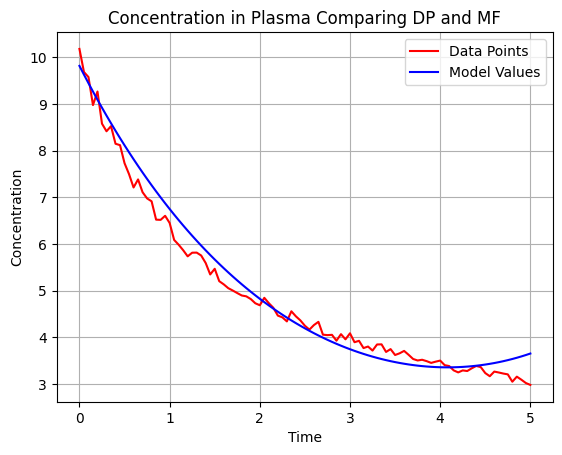

In [30]:
# The below plot illustrate a comparison between the given Data points and the
# results from the exponential peeling.


plt.plot(tme, y, color='red', label='Data Points')
plt.plot(tme, Modelvalues, color='blue', label='Model Values')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration in Plasma Comparing DP and MF')
plt.grid(True)
plt.legend()
plt.show()

In [31]:
# Our approximated values for the parameters are;
# b_1 = 9.619247027071083
# b_2 = -0.40357634
# b_3 = 0.1979670512427155
# b_4 = 0.4968639

In [32]:
diff = y - Modelvalues
SSE = np.sum(diff**2)
print(SSE)

8.085276212235492


(c) Using an optimization package in python to find the unknown parameters by minimizing the sum of the squares of the error (SSE) for the model in (a) together with the graph of the data and the approximate (3) from question.

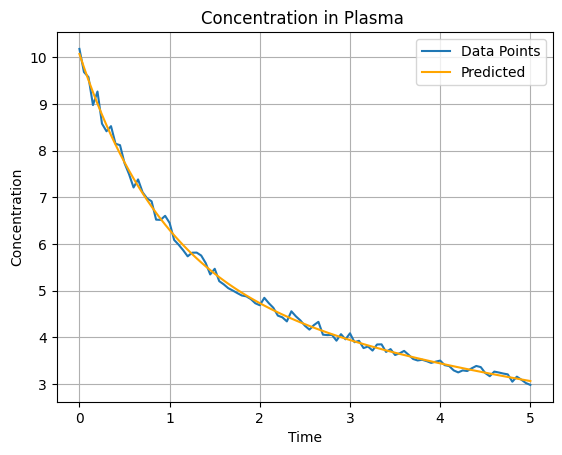

Optimized parameters: [ 5.12915232 -0.10455659  4.94363721 -1.07959743]
[ 5.12915232 -0.10455659  4.94363721 -1.07959743]


In [33]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the exponential function
def exponential_func(t, b1, b2, b3, b4):
    return b1 * np.exp(b2 * t) + b3 * np.exp(b4 * t)



t = Data[:, 0]
y_actual = Data[:, 1]

# Initial guess for the parameters
initial_guess = [1, 1, 1, 1]

# Fit the exponential model to the data
optimized_params, _ = curve_fit(exponential_func, t, y_actual, p0=initial_guess)

# Generate predicted values using the optimized parameters
y_predicted = exponential_func(t, *optimized_params)

# Plot the actual and predicted values
plt.plot(t, y_actual, label='Data Points')
plt.plot(t, y_predicted, color='orange', label='Predicted')
plt.xlabel('Time')
plt.title('Concentration in Plasma ')
plt.ylabel('Concentration')
plt.grid(True)
plt.legend()
plt.show()

# Print the optimized parameters
print("Optimized parameters:", optimized_params)
print(optimized_params)

In [34]:
print(y_predicted)

[10.07278954  9.78626285  9.51352688  9.25386352  9.0065924   8.77106885
  8.54668205  8.33285324  8.12903404  7.93470485  7.74937335  7.57257305
  7.40386195  7.24282122  7.08905404  6.94218438  6.80185596  6.66773118
  6.53949015  6.41682975  6.29946276  6.18711704  6.0795347   5.97647137
  5.87769549  5.78298766  5.69213996  5.60495536  5.52124715  5.44083844
  5.36356155  5.28925762  5.2177761   5.14897431  5.08271705  5.01887619
  4.95733032  4.89796435  4.84066923  4.78534161  4.73188353  4.68020218
  4.63020957  4.5818223   4.53496135  4.48955182  4.4455227   4.4028067
  4.36134004  4.32106225  4.28191602  4.24384702  4.20680376  4.17073742
  4.13560172  4.10135279  4.06794902  4.03535098  4.0035213   3.9724245
  3.94202699  3.91229689  3.88320397  3.85471958  3.82681654  3.79946907
  3.77265273  3.74634433  3.72052188  3.69516451  3.67025244  3.64576689
  3.62169006  3.59800504  3.57469579  3.5517471   3.52914454  3.50687439
  3.48492365  3.46327997  3.44193162  3.42086748  3.4

In [35]:
diff2 = y - y_predicted
SSE2 = np.sum(diff2**2)
print(SSE2)

0.9278843007588851


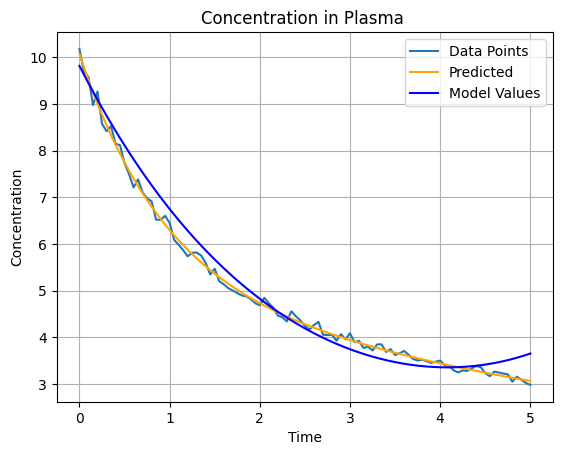

In [36]:
plt.plot(t, y_actual, label='Data Points')
plt.plot(t, y_predicted, color='orange', label='Predicted')
plt.plot(tme, Modelvalues, color='blue', label='Model Values')
plt.xlabel('Time')
plt.title('Concentration in Plasma ')
plt.ylabel('Concentration')
plt.grid(True)
plt.legend()
plt.show()